In [1]:
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
#import matplotlib   #ako se menja velicina slova


In [2]:
#ucitavanje skupa
df = pd.read_csv("C:/Users/student/Desktop/ipVezbe122021/primeri/unbalance.csv")

#Provera da li postoje nedostajuce vrednosti u skupu.
#Ukoliko postoje, potrebno ih je obraditi.
print('Da li postoje nedostajuce vrednosti u skupu: ', df.isnull().sum().sum()!=0)

#prikaz deskriptivnih statistika za svaki atribut radi provere opsega vrednosti po atributima
print('Deskriptivne statistike')
print(df.describe())



Da li postoje nedostajuce vrednosti u skupu:  False
Deskriptivne statistike
                   x              y
count    6500.000000    6500.000000
mean   203821.333692  359235.680923
std     86874.649532   19152.058268
min    139779.000000  271530.000000
25%    152688.500000  348794.500000
50%    180888.000000  352115.500000
75%    209470.750000  378274.000000
max    575805.000000  440940.000000


In [3]:
#posto se opseg vrednosti atributa x i y razlikuje, primenjuje se normalizacija atributa

#normalizacija atributa
x = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df), columns=df.columns)


In [4]:
# Definisanje boja koje se koriste pri crtanju instanci klastera.
# Instance jednog klastera ce biti prikazane istom bojom.
# Kod algoritma DBSCAN sum ce biti prikazan crnom bojom.
colors = ['darkcyan', 'red', 'green', 'gold', 'blue',  'm', 'plum', 'orange', 'black']

#postavljanje velicine slova na slikama
#font = {'size'   : 6}
#matplotlib.rc('font', **font)


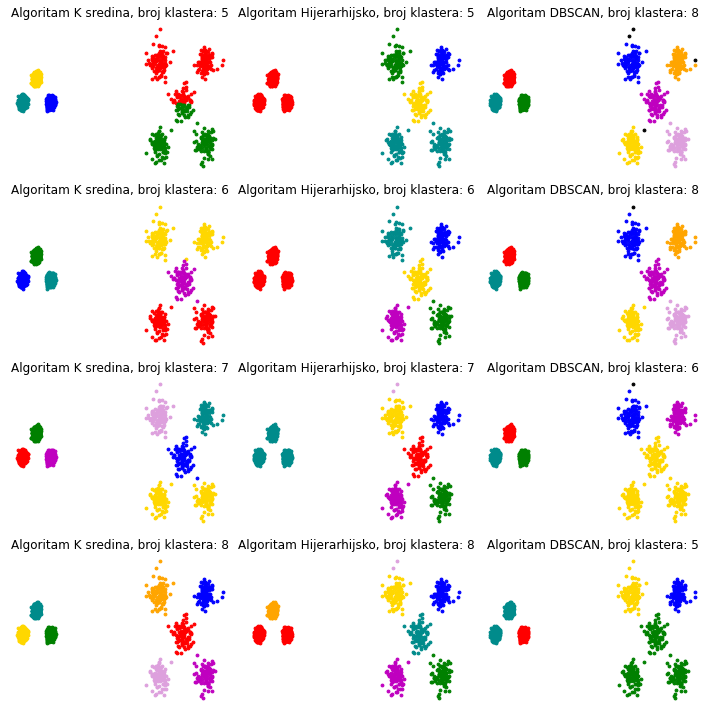

In [5]:
#recnik koji ce sadrzati silueta koeficijent za razlicit broj dobijenih klastera
#pri primeni razlicitih algoritama klasterovanja
silhouette_scores = {'K sredina':{'clusters':[], 'score':[]},
                     'Hijerarhijsko':{'clusters':[], 'score':[]},
                     'DBSCAN':{'clusters':[], 'score':[]}}

# pravljenje slike koja ce prikazati rezultat izvrsenih klasterovanja
# pomocu seme sa rasprsenim elementima
fig = plt.figure(figsize=(10,10))
plt_ind=1

#Primena tri algoritma klasterovanja sa razlicitim vrednostima za parametre (za k sredina i
# hijerahijsko klasterovanje menja se broj zeljenih klastera (od 5 do 8), a za algoritam
# DBSCAN rastojanje za susedne instance.
for i in range(5, 9):
    estimators= { 'K sredina': KMeans(n_clusters=i),
                  'Hijerarhijsko': AgglomerativeClustering(n_clusters=i, linkage='average'),
                  'DBSCAN': DBSCAN(eps=i*0.01)
                  }

    #primena svakog od algoritama sa zadatim vrednostima za parametre
    for name, est in estimators.items():  #items za svaki element vraca (kljuc, vrednost za taj kljuc)
        est.fit(x)

        # Originalnom skupu se dodaje jos jedan atribut 'label', koji sadrzi
        # podatak kom klasteru pripada koja instanca.
        # Oznake klastera su u intervalu [0, n_clusters-1]
        # Kod DBSCAN algoritma, instance tipa sum imaju oznaku -1.
        df['labels']= est.labels_

        # Podela slike na 4x3 celije i zadavanje
        # celije (plt_ind) u kojoj ce se izvrsiti naredna crtanja.
        # U jednoj celiji ce biti prikazan rezultat jednog klasterovanja.
        fig.add_subplot(4, 3, plt_ind)

        #odredjivanje broja klastera
        if name=='DBSCAN':
            num_clusters = max(est.labels_) + 1
            min=-1
        else:
            num_clusters=i
            min=0

        # obrada svakog klastera u rezultatu jednog klasterovanja
        for j in range(min, num_clusters):
            # izdvajanje instanci klastera koji se obradjuje
            cluster= df.loc[df['labels'] == j, :]
            # crtanje instanci klastera pomocu seme sa rasprsenim elementima
            plt.scatter(cluster['x'], cluster['y'], color=colors[j], s=8, marker='o')

        #postavljanje naslova (koji sadrzi naziv primenjenog algoritma i broj izdvojenih klastera)
        # za svaku celiju
        plt.title('Algoritam {0}, broj klastera: {1}'.format(name, num_clusters))

        #postavka da se ne prikazuju ose
        plt.axis('off')

        # prelazak u narednu celiju u kojoj ce se prikazati
        # rezultat narednog klasterovanja
        plt_ind += 1

        #cuvanje podataka o broju klastera i silueta koeficijentu za izvrseno klasterovanje
        #radi grafickog prikaza
        silhouette_scores[name]['clusters'].append(num_clusters)
        silhouette_scores[name]['score'].append(silhouette_score(x, est.labels_))

#pravljenje slike bez poklapanja celija
plt.tight_layout()


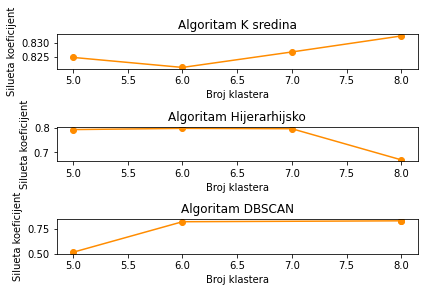

In [6]:
# Pravljenje slike koja ce prikazati rezultat izvrsenih klasterovanja
# pomocu broja izdvojenih klastera i senka koeficijenta.

# Za svaki primenjeni algoritam pravi se poseban grafik.
# Rezultat za jedno izvrseno klasterovanje se prikazuje kao jedna tacka na grafiku.
# Na x-osi se prikazuje broj izdvojenih klastera, a na y-osi izracunati senka koeficijent.

# Za odredjivanje optimalnog broja klastera (za zadate parametre) trazi se
# klasterovanje sa najvecim senka koeficijentom.

fig = plt.figure()
plt_ind=1
#za svaki algoritam se prikazuje poseban grafik
for name in silhouette_scores:
    # Podela slike na 3x1 celije i zadavanje
    # celije (plt_ind) u kojoj ce se izvrsiti naredna crtanja.
    # U jednoj celiji ce biti prikazani rezultati za jedan algoritam klasterovanja.
    fig.add_subplot(3, 1, plt_ind)

    #prikaz rezultata klasterovanja
    plt.plot(silhouette_scores[name]['clusters'], silhouette_scores[name]['score'],  color='darkorange', marker='o')
   
    # postavljanje teksta za x i y osu i naslova
    plt.xlabel('Broj klastera')
    plt.ylabel('Silueta koeficijent')
    plt.title('Algoritam %s' % name)

    # Prelazak u narednu celiju u kojoj ce biti prikazani
    # rezultati klasterovanja za sledeci algoritam
    plt_ind+=1

#pravljenje slike bez poklapanja celija
plt.tight_layout()

In [7]:
#Sva izvrsena klasterovanja imaju senka koeficijent iznad 0,5, cime se smatra da je izvrseno
# dobro klasterovanje.

#Na osnovu grafika sa prikazanim senka koeficijentom zakljucuje se da je za algoritma
# *K-sredina najbolje izdvojiti 8 klastera, sto potvrdjuje i slika sa prikazom instanci po klasterima.

# *hijerarhijsko klasterovanje najbolje izdvojiti 6 ili 7 klastera. Na osnovu slike sa prikazom
#  instanci po klasterima, za hijerarhijsko klasterovanje je bolje izdvojiti 6 klastera,
#  jer se kao 7. klaster izdvaja svega nekoliko instanci koje nisu dobro razdvojene od
#  drugih klastera.

# *DBSCAN najbolje izdvojiti 6 ili 8 klastera. Na osnovu slike sa prikazom
# instanci po klasterima, sa algoritmom DBSCAN je bolje izdvojiti 8 klastera.
